In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [59]:
demos = pd.read_csv(r'C:\Users\pairwin\Documents\GitHub\IPy_Notebooks\SQL\shrink_demos.csv', index_col='STORE_NUMBER')
targets = pd.read_csv(r'C:\Users\pairwin\Documents\GitHub\IPy_Notebooks\SQL\shrink_targets.csv', index_col='STORE_NUMBER')

In [60]:
demos.head()

,tot_pop,pop_growth,med_hh_income,pct_wht_pop,med_age,pct_home_owners,pct_hh_below_poverty
STORE_NUMBER,,,,,,,
19,66148,-0.16,30555,36.19,34.6,35.13,30.46
417,102796,1.28,63803,81.21,36.2,58.41,8.20
15,170579,0.05,51588,52.41,35.9,55.38,16.29
415,294605,1.10,48039,55.35,31.3,58.05,21.98
498,31254,2.06,60166,87.68,29.4,79.54,8.67


In [61]:
#I want to think about shrink as a growing value as it gets worse
#ergo I will apply abs value function
targets['target_theft'] = targets['target_theft'].apply(abs)
targets.head()

,target_theft,target_total_shrink
STORE_NUMBER,,
1,59076.29,58515.15
3,18642.78,-30993.74
4,49506.54,-79491.22
5,40896.92,-34639.75
6,17143.70,31015.94


In [62]:
data = targets.join(demos, on='STORE_NUMBER')

In [63]:
data.describe()

,target_theft,target_total_shrink,tot_pop,pop_growth,med_hh_income,pct_wht_pop,med_age,pct_home_owners,pct_hh_below_poverty
count,159.000000,161.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,27362.357987,15653.748137,81985.764706,0.967778,62039.601307,69.852680,36.973203,58.652810,13.976013
std,14871.714046,130952.606736,55594.891884,0.867167,20483.449466,17.417828,4.682007,13.417964,7.194707
min,1245.270000,-968747.320000,1725.000000,-0.930000,25717.000000,10.910000,25.900000,26.180000,2.450000
25%,16788.465000,-31332.510000,43763.000000,0.410000,47373.000000,56.410000,34.100000,47.050000,8.430000
50%,23778.670000,30422.270000,73814.000000,0.890000,57162.000000,71.070000,36.300000,59.450000,11.960000
75%,35421.980000,76624.340000,106066.000000,1.520000,76514.000000,84.990000,38.800000,69.490000,17.600000
max,77896.000000,288370.960000,294605.000000,4.100000,133028.000000,96.060000,58.400000,86.880000,31.820000


In [67]:
data.columns

Index(['target_theft', 'target_total_shrink', 'tot_pop', 'pop_growth',
       'med_hh_income', 'pct_wht_pop', 'med_age', 'pct_home_owners',
       'pct_hh_below_poverty'],
      dtype='object')

In [78]:
collistX = ['tot_pop', 'pop_growth',
       'med_hh_income', 'pct_wht_pop', 'med_age', 'pct_home_owners',
       'pct_hh_below_poverty']

collistY = ['target_theft']

X_train, X_test, y_train, y_test = train_test_split(data[collistX], data[collistY], test_size=0.33, random_state=42)

<AxesSubplot:>

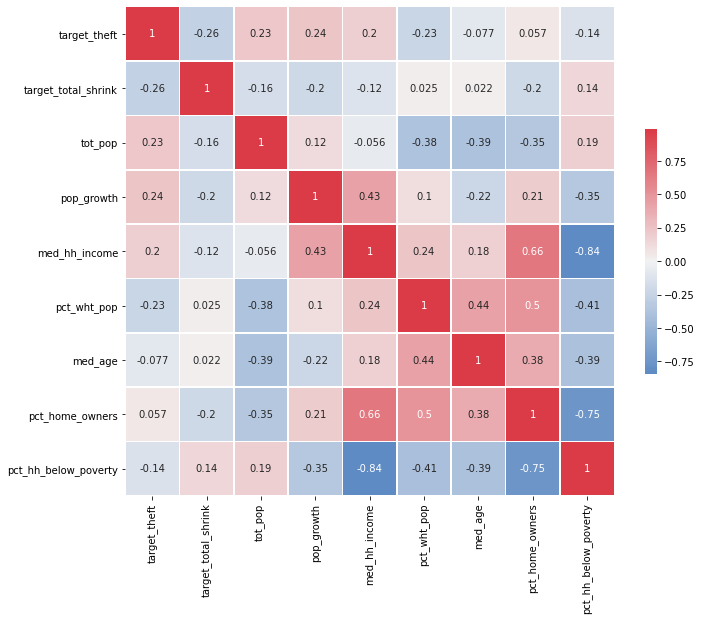

In [73]:
corr = data.corr()

f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmax=.99, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='target_theft', ylabel='Count'>

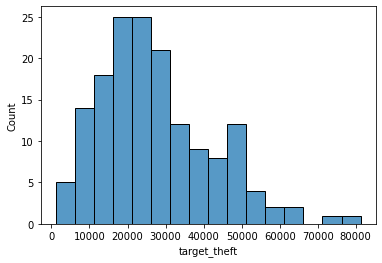

In [71]:
sns.histplot(data=data, x='target_theft', binwidth=5000)

In [83]:
scalerX = StandardScaler()
scalerX.fit(X_train)

scalery = StandardScaler()
scalery.fit(y_train)

StandardScaler()

In [86]:
X_train = pd.DataFrame(scalerX.transform(X_train.values), columns = collistX)
X_test = pd.DataFrame(scalerX.transform(X_test.values), columns = collistX)

y_train = pd.DataFrame(scalery.transform(y_train.values), columns=collistY)
y_test = pd.DataFrame(scalery.transform(y_test.values), columns=collistY)

In [90]:
X_test.describe()

,tot_pop,pop_growth,med_hh_income,pct_wht_pop,med_age,pct_home_owners,pct_hh_below_poverty
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-1.521978,-0.835049,-2.970501,-3.975469,-7.641683,-4.318849,-1.907627
std,0.000023,1.277766,0.000045,0.053531,0.185449,0.071739,0.119934
min,-1.522007,-3.113012,-2.970561,-4.086093,-7.987400,-4.448263,-2.087747
25%,-1.521994,-1.921431,-2.970531,-4.015953,-7.756580,-4.376932,-1.985944
50%,-1.521982,-0.842663,-2.970516,-3.971220,-7.683915,-4.316593,-1.940146
75%,-1.521969,-0.098807,-2.970482,-3.927365,-7.565299,-4.262757,-1.841007
max,-1.521901,2.739128,-2.970388,-3.895000,-6.995729,-4.168450,-1.670959
